In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d
from sklearn import linear_model

In [19]:
bpsDf = pd.read_excel('indo_12_1.xls', na_values = '-', header = 3, skipfooter = 2)
bpsDf.rename(columns = {'Unnamed: 0':'Provinsi'}, inplace = True)
provinsiDf = bpsDf[:33]
provinsiDf

,Provinsi,1971,1980,1990,1995,2000,2010
0,Aceh,2008595.0,2611271.0,3416156.0,3847583.0,3930905.0,4494410
1,Sumatera Utara,6621831.0,8360894.0,10256027.0,11114667.0,11649655.0,12982204
2,Sumatera Barat,2793196.0,3406816.0,4000207.0,4323170.0,4248931.0,4846909
3,Riau,1641545.0,2168535.0,3303976.0,3900534.0,4957627.0,5538367
4,Jambi,1006084.0,1445994.0,2020568.0,2369959.0,2413846.0,3092265
5,Sumatera Selatan,3440573.0,4629801.0,6313074.0,7207545.0,6899675.0,7450394
6,Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518
7,Lampung,2777008.0,4624785.0,6017573.0,6657759.0,6741439.0,7608405
8,Kepulauan Bangka Belitung,NaN,NaN,NaN,NaN,900197.0,1223296
9,Kepulauan Riau,NaN,NaN,NaN,NaN,NaN,1679163


In [20]:
indonesiaDf = bpsDf[33:34]
indonesiaDf

,Provinsi,1971,1980,1990,1995,2000,2010
33,INDONESIA,119208229.0,147490298.0,179378946.0,194754808.0,206264595.0,237641326


In [21]:
prov2010Max = provinsiDf[provinsiDf[2010] == provinsiDf[2010].max()]
prov2010Max

,Provinsi,1971,1980,1990,1995,2000,2010
11,Jawa Barat,21623529.0,27453525.0,35384352.0,39206787.0,35729537.0,43053732


In [22]:
prov1971Min = provinsiDf[provinsiDf[1971] == provinsiDf[1971].min()]
prov1971Min

,Provinsi,1971,1980,1990,1995,2000,2010
6,Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518


In [39]:
listProv = []
listProv.append(prov2010Max.iloc[0, 0])
listProv.append(prov1971Min.iloc[0, 0])
listProv.append(indonesiaDf.iloc[0, 0])
listProv

['Jawa Barat', 'Bengkulu', 'INDONESIA']

In [34]:
dataMax = []
for i in prov2010Max.columns:
    val = list(prov2010Max[i])
    for j in val:
        dataMax.append(j)
dataMax = dataMax[1:]
dataMax

[21623529.0, 27453525.0, 35384352.0, 39206787.0, 35729537.0, 43053732]

In [35]:
dataMin = []
for i in prov1971Min.columns:
    val = list(prov1971Min[i])
    for j in val:
        dataMin.append(j)
dataMin = dataMin[1:]
dataMin

[519316.0, 768064.0, 1179122.0, 1409117.0, 1567432.0, 1715518]

In [43]:
listTahun = []
listTahun = bpsDf.columns.tolist()
listTahun = listTahun[1:]
listTahun

[1971, 1980, 1990, 1995, 2000, 2010]

In [44]:
dataIndo = []
for i in indonesiaDf.columns:
    val = list(indonesiaDf[i])
    for j in val:
        dataIndo.append(j)
dataIndo = dataIndo[1:]
dataIndo

[119208229.0, 147490298.0, 179378946.0, 194754808.0, 206264595.0, 237641326]

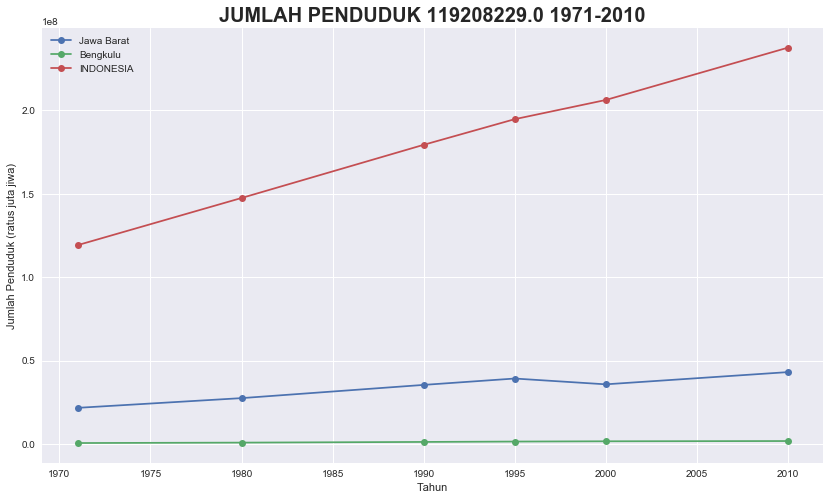

In [48]:
plt.style.use("seaborn")
plt.figure(figsize= (14,8))
plt.plot(listTahun, dataMax, "-o")
plt.plot(listTahun, dataMin, "-o")
plt.plot(listTahun, dataIndo, "-o")
plt.legend(listProv)
plt.title(f"JUMLAH PENDUDUK {dataIndo[0]} 1971-2010", size=20, fontweight='bold')
plt.xlabel("Tahun")
plt.show()

In [60]:
dataList = []
for i in range(len(dataMax)):
    tempList = []
    tempList.append(listTahun[i])
    tempList.append(dataMax[i])
    tempList.append(dataMin[i])
    tempList.append(dataIndo[i])
    dataList.append(tempList)
dataList

dataDf = pd.DataFrame(dataList)
dataDf.rename(columns = {0 : 'tahun', 1: 'Max', 2 : 'Min', 3 : 'Indo'}, inplace = True)
dataDf

,tahun,Max,Min,Indo
0,1971,21623529.0,519316.0,119208229.0
1,1980,27453525.0,768064.0,147490298.0
2,1990,35384352.0,1179122.0,179378946.0
3,1995,39206787.0,1409117.0,194754808.0
4,2000,35729537.0,1567432.0,206264595.0
5,2010,43053732.0,1715518.0,237641326.0


In [71]:
modelIndo = linear_model.LinearRegression()
modelIndo = modelIndo.fit(dataDf[['tahun']], dataDf['Indo'])
dataDf['RegAll'] = modelIndo.predict(dataDf[['tahun']])

modelMax = linear_model.LinearRegression()
modelMax = modelMax.fit(dataDf[['tahun']], dataDf['Max'])
dataDf['RegMax'] = modelMax.predict(dataDf[['tahun']])
                               
modelMin = linear_model.LinearRegression()
modelMin = modelMin.fit(dataDf[['tahun']], dataDf['Min'])
dataDf['RegMin'] = modelMin.predict(dataDf[['tahun']])
dataDf

,tahun,Max,Min,Indo,RegAll,RegMax,RegMin
0,1971,21623529.0,519316.0,119208229.0,1.202867e+08,2.299558e+07,5.334203e+05
1,1980,27453525.0,768064.0,147490298.0,1.475130e+08,2.783143e+07,8.302738e+05
2,1990,35384352.0,1179122.0,179378946.0,1.777645e+08,3.320459e+07,1.160111e+06
3,1995,39206787.0,1409117.0,194754808.0,1.928903e+08,3.589118e+07,1.325030e+06
4,2000,35729537.0,1567432.0,206264595.0,2.080161e+08,3.857776e+07,1.489948e+06
5,2010,43053732.0,1715518.0,237641326.0,2.382676e+08,4.395092e+07,1.819786e+06


In [74]:
print(f"Prediksi jumlah penduduk {listProv[0]} di tahun 2050: {round(modelMax.predict([[2050]])[0])}")
print(f"Prediksi jumlah penduduk {listProv[1]} di tahun 2050: {round(modelMin.predict([[2050]])[0])}")
print(f"Prediksi jumlah penduduk {listProv[2]} di tahun 2050: {round(modelIndo.predict([[2050]])[0])}")

Prediksi jumlah penduduk Jawa Barat di tahun 2050: 65443585.0
Prediksi jumlah penduduk Bengkulu di tahun 2050: 3139135.0
Prediksi jumlah penduduk INDONESIA di tahun 2050: 359273669.0


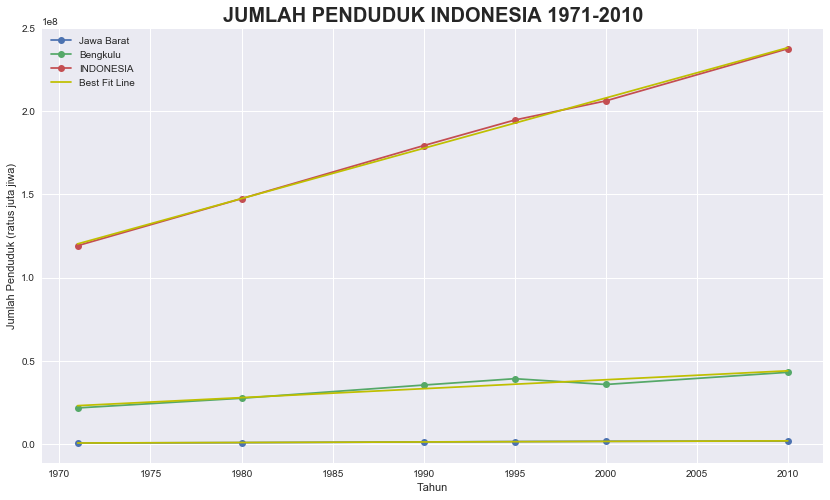

In [78]:
plt.style.use("seaborn")
plt.figure(figsize= (14,8))
plt.plot(listTahun, dataMin, "-o")
plt.plot(listTahun, dataMax, "-o")
plt.plot(listTahun, dataIndo, "-o")
plt.plot(listTahun, dataDf["RegAll"], "y-")
plt.plot(listTahun, dataDf["RegMin"], "y-")
plt.plot(listTahun, dataDf["RegMax"], "y-")
plt.legend([listProv[0], listProv[1], listProv[2], "Best Fit Line"])
plt.title(f"JUMLAH PENDUDUK {listProv[2]} 1971-2010", size=20, fontweight='bold')
plt.xlabel("Tahun")
plt.ylabel("Jumlah Penduduk (ratus juta jiwa)")
plt.show()